# About Dataset
This dataset is used for binary classification and contains four numerical features: variance, skewness, curtosis, and entropy. These features are likely extracted from image or signal data. The target variable, "class," indicates one of two possible outcomes. The dataset helps train machine learning models to distinguish between the two classes. It is suitable for evaluating classification algorithms such as logistic regression, decision trees, and neural networks.

# Loading Libraries

In [2]:
import pandas as pd 
import numpy as np 
import os 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import FunctionTransformer  
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.decomposition import PCA 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import accuracy_score

# Reading Data

In [3]:
import pandas as pd 
import numpy as np 
import os
data = pd.read_csv("C:/Users/MSI/Downloads/BankNote_Authentication.csv")

In [4]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Exploring Data

In [5]:
data.shape

(1372, 5)

In [6]:
data.ndim

2

In [7]:
data['class'].value_counts().rename('count'),
data['class'].value_counts(normalize=True).rename('%').mul(100)

class
0    55.539359
1    44.460641
Name: %, dtype: float64

In [8]:
data["class"].value_counts()

class
0    762
1    610
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Samples per Class')

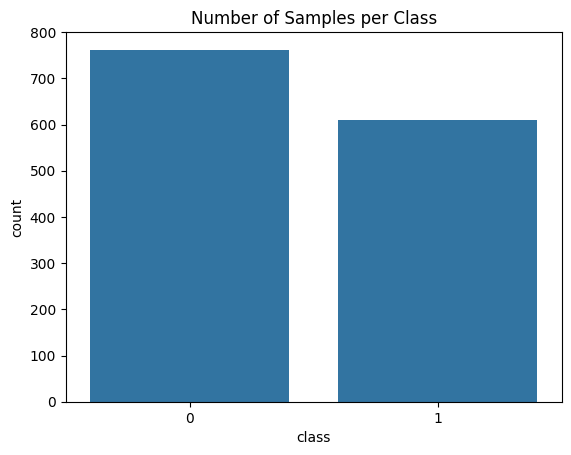

In [9]:
sns.countplot(data=data, x='class')
plt.title('Number of Samples per Class')

In [10]:
data.sample(20)

,variance,skewness,curtosis,entropy,class
310,4.02150,-2.700400,2.495700,0.36636,0
1100,1.43780,0.668370,-2.026700,1.02710,1
1157,-5.20490,7.259000,0.070827,-7.30040,1
637,3.30040,7.081100,-1.325800,0.22283,0
1331,0.22432,-0.521470,-0.403860,1.20170,1
369,2.19480,1.378100,1.158200,0.85774,0
972,1.35180,1.059500,-2.343700,0.39998,1
259,3.03290,2.294800,2.113500,0.35084,0
232,2.25960,-0.033118,4.735500,-0.27760,0
606,-1.42750,11.879700,0.416130,-6.99780,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [12]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [13]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


# features name

In [14]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [15]:
data["class"].value_counts()

class
0    762
1    610
Name: count, dtype: int64

# Missing Values

In [16]:
print('Missing data sum:')
print(data.isnull().sum())

print('\nMissing data percentage (%):')
print(data.isnull().sum() / len(data) * 100)

Missing data sum:
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Missing data percentage (%):
variance    0.0
skewness    0.0
curtosis    0.0
entropy     0.0
class       0.0
dtype: float64


# Correlation Matrix

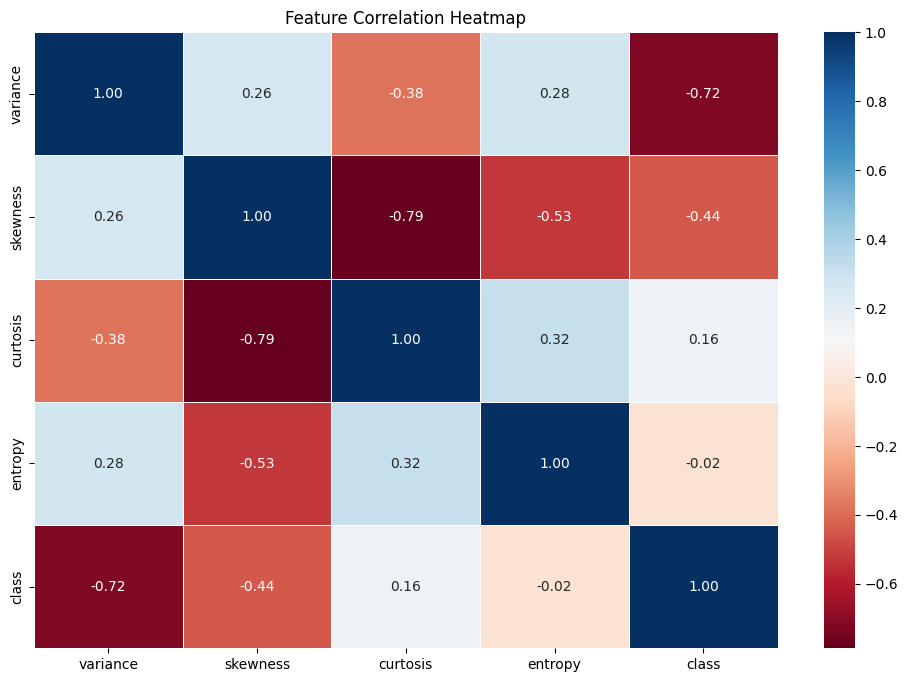

In [17]:
fig = plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, linewidths=0.5, cmap="RdBu", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

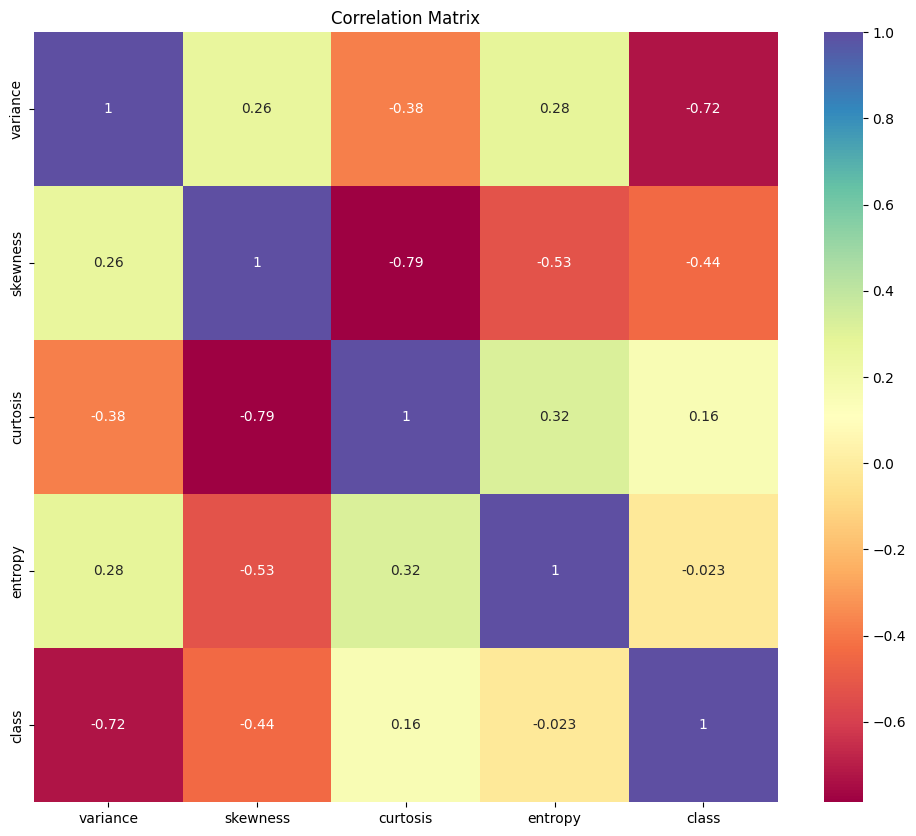

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral')
plt.title("Correlation Matrix")
plt.show()

# Seperate Categorical and Numerical Features

In [19]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:', cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [20]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*' * 80)
print('Numerical Variables Column: ', numerical_features)

Number of numerical variables:  5
********************************************************************************
Numerical Variables Column:  ['variance', 'skewness', 'curtosis', 'entropy', 'class']


# Checking Duplicating Values

In [21]:
data.duplicated().sum()

np.int64(24)

In [22]:
data['class'].unique() 

array([0, 1])

In [23]:
data['variance'].nunique()

1338

In [24]:
data['skewness'].sample(10)

1134     2.7956
493     11.3045
894     -9.0883
783      3.3605
938     -5.5167
286     -4.4221
611      8.9951
160      3.8964
1020     6.6755
739     -6.4748
Name: skewness, dtype: float64

In [25]:
data['variance'].unique()

array([ 3.6216,  4.5459,  3.866 , ..., -3.7503, -3.5637, -2.5419])

In [26]:
data['skewness'].unique()

array([  8.6661 ,   8.1674 ,  -2.6383 , ..., -13.4586 ,  -8.3827 ,
        -0.65804])

In [27]:
data['class'].unique()

array([0, 1])

In [28]:
data['curtosis'].unique()

array([-2.8073, -2.4586,  1.9242, ..., 17.5932, 12.393 ,  2.6842])

In [29]:
data['entropy'].unique()

array([-0.44699, -1.4621 ,  0.10645, ..., -1.2953 , -0.55949, -2.7771 ])

In [30]:
data['variance'].nunique()

1338

In [31]:
data['entropy'].nunique()

1156

In [32]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [33]:
data['variance'].unique()

array([ 3.6216,  4.5459,  3.866 , ..., -3.7503, -3.5637, -2.5419])

[Text(0.5, 1.0, 'Correlation Matrix')]

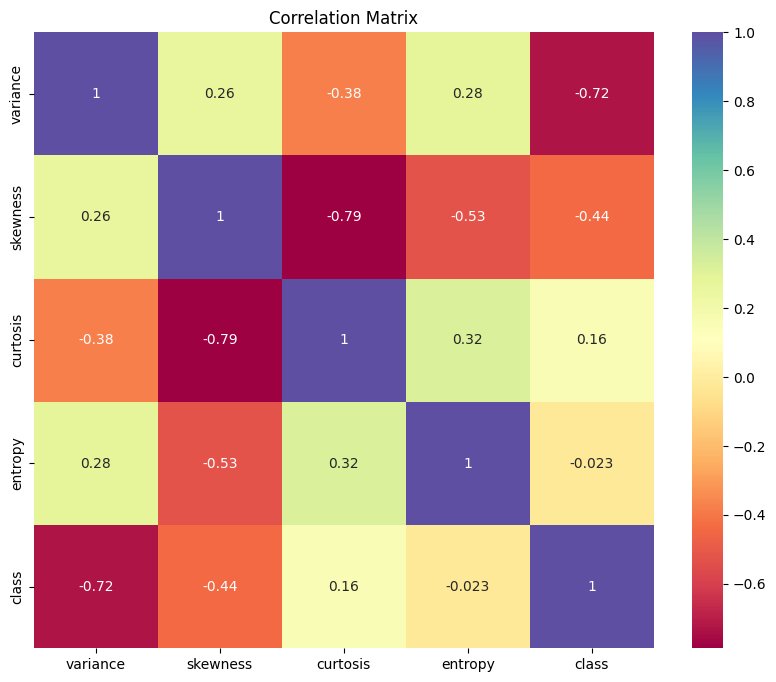

In [34]:
corr = data.corr() 
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [35]:
corr_matrix = data.corr().round(2)
corr_matrix              

,variance,skewness,curtosis,entropy,class
variance,1.00,0.26,-0.38,0.28,-0.72
skewness,0.26,1.00,-0.79,-0.53,-0.44
curtosis,-0.38,-0.79,1.00,0.32,0.16
entropy,0.28,-0.53,0.32,1.00,-0.02
class,-0.72,-0.44,0.16,-0.02,1.00


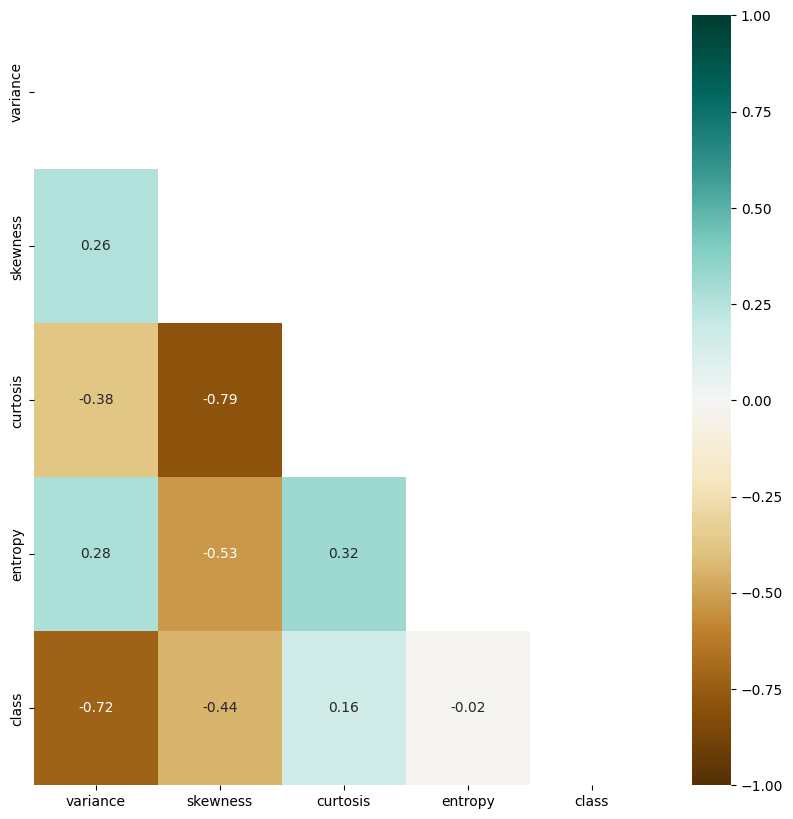

In [36]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [37]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*' * 80)
print('Categorical variables column name:', cat_features)

Number of categorical variables:  0
********************************************************************************
Categorical variables column name: []


In [38]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*' * 80)
print('Numerical Variables Column: ', numerical_features)

Number of numerical variables:  5
********************************************************************************
Numerical Variables Column:  ['variance', 'skewness', 'curtosis', 'entropy', 'class']


Visualizing Categorical Features
-

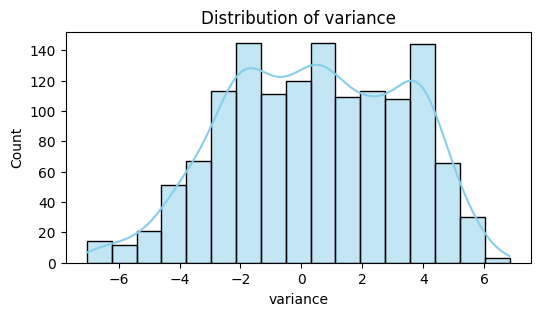

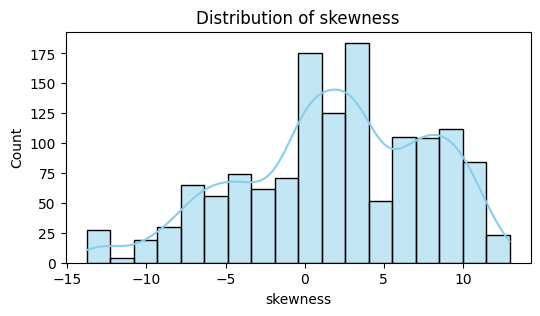

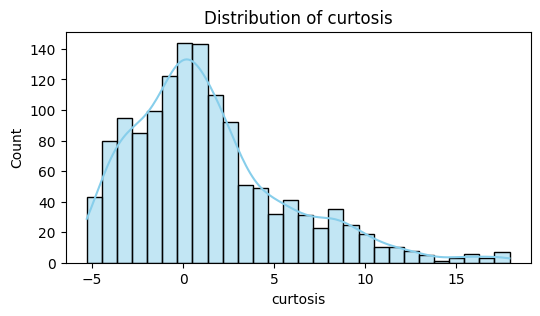

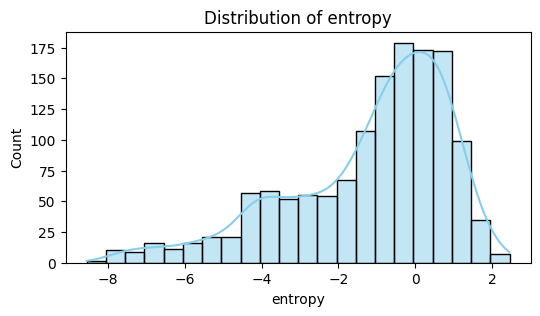

In [39]:
for col in ['variance', 'skewness', 'curtosis', 'entropy']:
    plt.figure(figsize=(6,3), dpi=100)
    sns.histplot(data=data, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

# Barplot of numerical features:

-

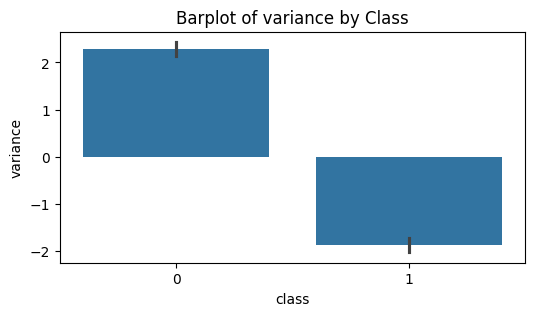

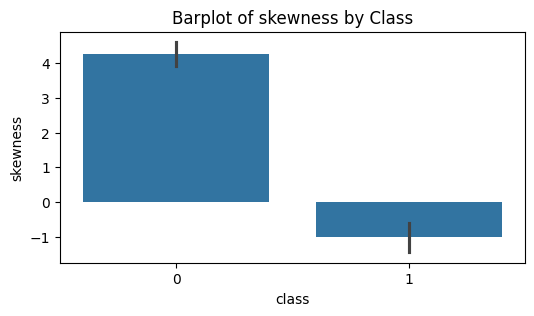

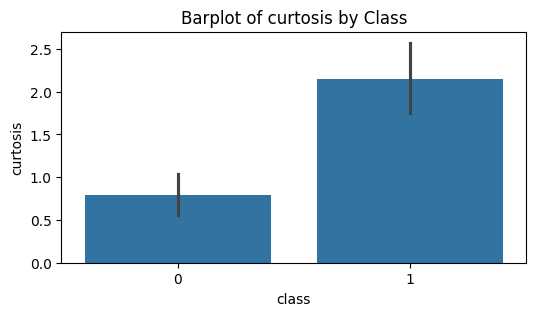

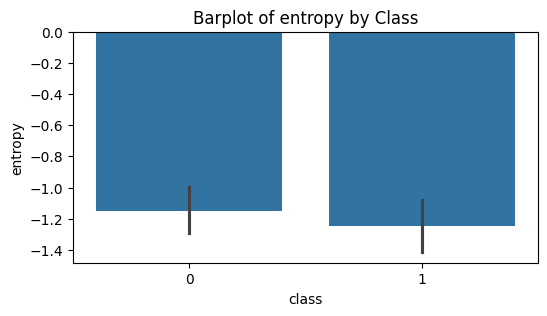

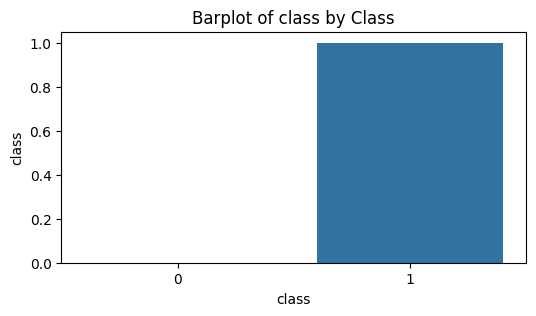

In [40]:
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=data, x='class', y=col)
    plt.title(f'Barplot of {col} by Class')
    plt.show()

# Handling Missing Values

In [41]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [42]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [43]:
data["variance"] = data["variance"].fillna(data["variance"].mean())

In [44]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# dropping irrelevant feature "id"

In [45]:
train  = data.drop(['class'],axis=1)
train

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [46]:
train.columns

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

In [47]:
train.shape

(1372, 4)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [50]:
train_data_num = train.select_dtypes(include="number")
train_data_cat = pd.DataFrame()

In [51]:
train_data_cat.head(3)

""


In [52]:
train_data_num.head(3)

,variance,skewness,curtosis,entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


Converting categorical features into numerical
-

In [54]:
train_data_num = train.select_dtypes(include="number") 
final_train_data = train_data_num.copy()

In [55]:
train_data = data.copy()
train_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# seperate dependant and independant feature

In [56]:
y = data['class']
x = data.drop('class', axis = 1)

In [57]:
print(x.shape)
print(y.shape)

(1372, 4)
(1372,)


# scailing the data

In [58]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [59]:
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

# Splitting data into Training and Testing

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Splitting the dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((960, 4), (412, 4))

# Building Classifiers

In [62]:
accuracy = {}

# Logistic Regression

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [69]:
y_pred1 = lr.predict(X_test)

In [70]:
accuracy = {} 

In [71]:
accuracy_score_result = accuracy_score(y_test, y_pred1)
print("Logistic Regression Accuracy:", accuracy_score_result)
accuracy[str(lr)] = accuracy_score_result * 100

Logistic Regression Accuracy: 0.9854545454545455


# Confusion Matrix 

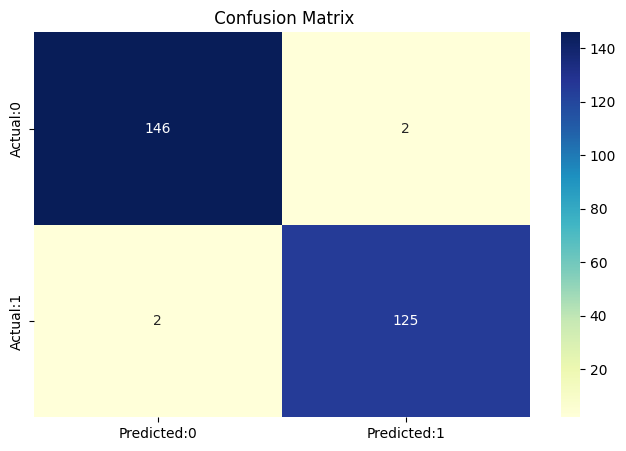

In [72]:
cm = confusion_matrix(y_test, y_pred1)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title(" Confusion Matrix")
plt.show()

# Classification Report

In [73]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Predicting

In [74]:
y_pred_test = lr.predict(X_test)
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [75]:
test.sample(10)

,Actual,Y test predicted
778,1,1
113,0,0
1338,1,1
1225,1,1
1285,1,1
966,1,1
918,1,0
715,0,0
617,0,0
594,0,0


# DecisionTreeClassifier

In [76]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [77]:
y_pred2 = dtc.predict(X_test)

In [78]:
print(accuracy_score(y_test, y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test, y_pred2)*100

0.9090909090909091


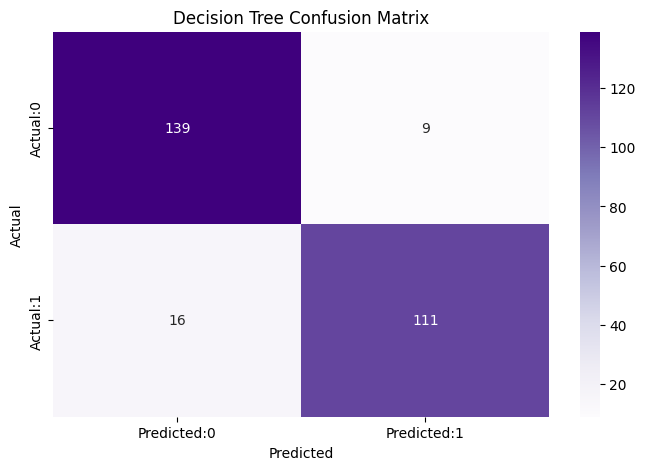

In [79]:
cm = confusion_matrix(y_test, y_pred2)
conf_matrix = pd.DataFrame(data=cm, 
                           columns=['Predicted:0', 'Predicted:1'], 
                           index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples") 
plt.title("Decision Tree Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

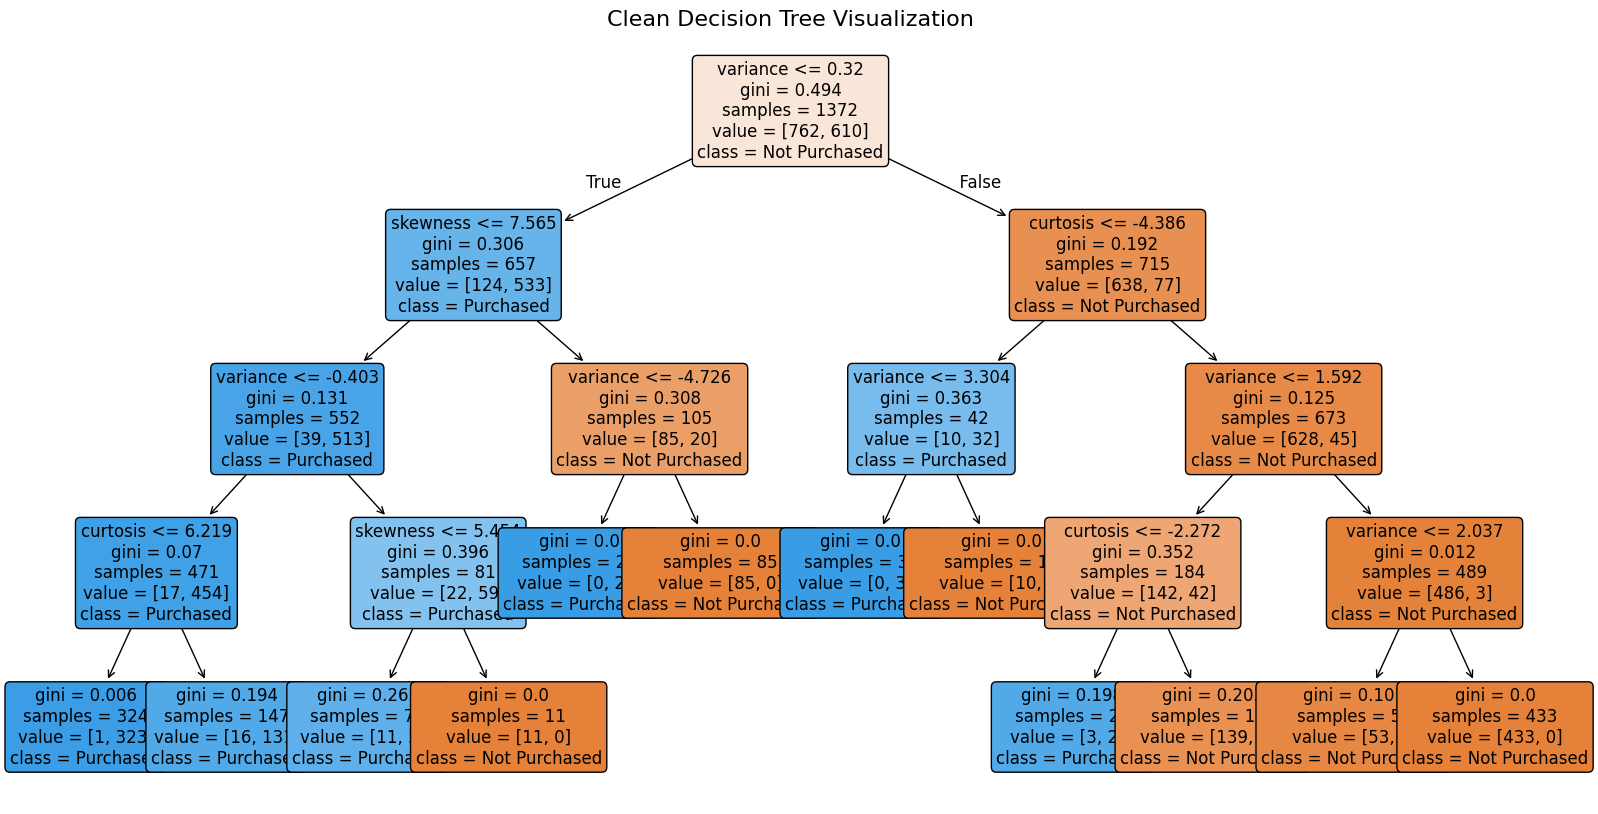

In [86]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  
dt_model.fit(X, y)
plt.figure(figsize=(20, 10))  
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Not Purchased', 'Purchased'],
          filled=True,
          rounded=True,
          fontsize=12)  
plt.title('Clean Decision Tree Visualization', fontsize=16)
plt.show()

In [87]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       148
           1       0.93      0.87      0.90       127

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



In [88]:
y_pred_test = dtc.predict(X_test)
test = pd.DataFrame({
    'Actual': y_test,
    'Y test predicted': y_pred_test
})

In [89]:
test.head(5)

,Actual,Y test predicted
430,0,0
588,0,0
296,0,1
184,0,0
244,0,0


In [90]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3)*100

0.9818181818181818


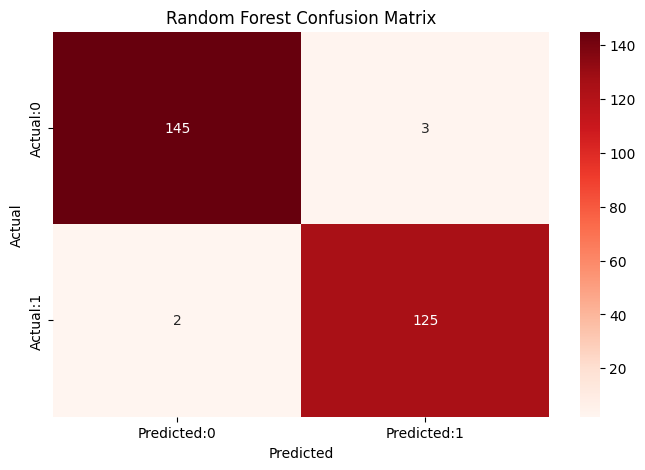

In [91]:
cm = confusion_matrix(y_test, y_pred3)
conf_matrix = pd.DataFrame(data=cm, 
                           columns=['Predicted:0', 'Predicted:1'], 
                           index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds")  
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [92]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4)*100

1.0


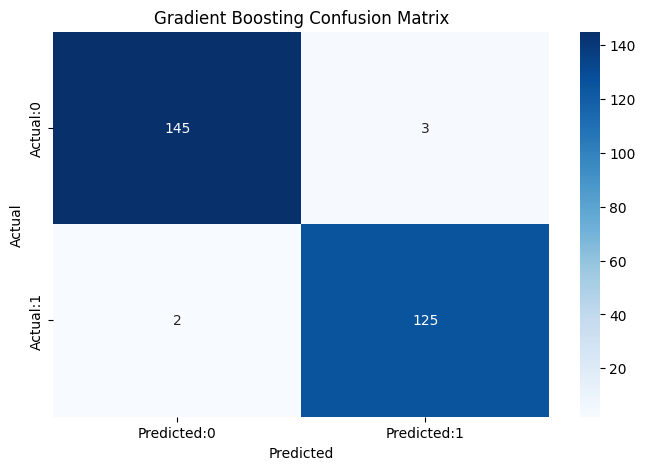

In [93]:
cm = confusion_matrix(y_test, y_pred3)
conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'], 
                           index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")  
plt.title("Gradient Boosting Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# SVM 

In [94]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [95]:
y_pred5 = svc.predict(X_test)

In [96]:
print(accuracy_score(y_test, y_pred5))
accuracy[str(svc)] = accuracy_score(y_test, y_pred5)*100

1.0


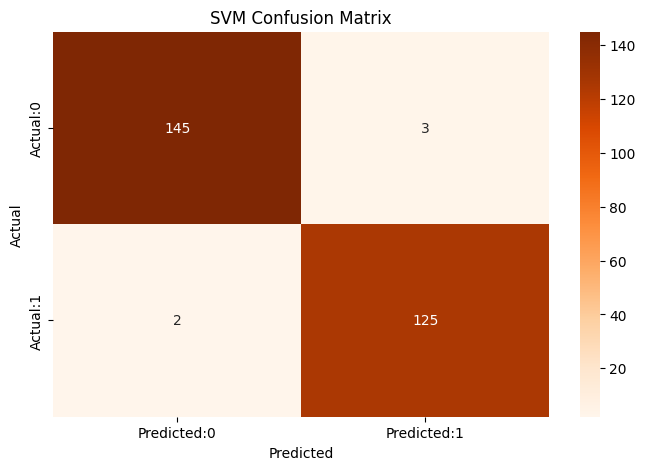

In [97]:
cm = confusion_matrix(y_test, y_pred3)
conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'], 
                           index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Oranges")  
plt.title("SVM Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [98]:
accuracy

{'LogisticRegression(max_iter=200)': 98.54545454545455,
 'DecisionTreeClassifier(max_depth=3)': 90.9090909090909,
 'RandomForestClassifier(max_depth=5)': 98.18181818181819,
 'GradientBoostingClassifier()': 100.0,
 'SVC()': 100.0}

# Conclusion

# Handling this data using SMOTE

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)
print(y1.value_counts())

class
0    762
1    762
Name: count, dtype: int64


# Splitting the oversampling data

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, test_size=0.3 ,shuffle = True,random_state = 3)

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1066, 4)
(458, 4)
(1066,)
(458,)


In [103]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [104]:
y_pred1 = lr.predict(X_test)

In [105]:
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.980349344978166


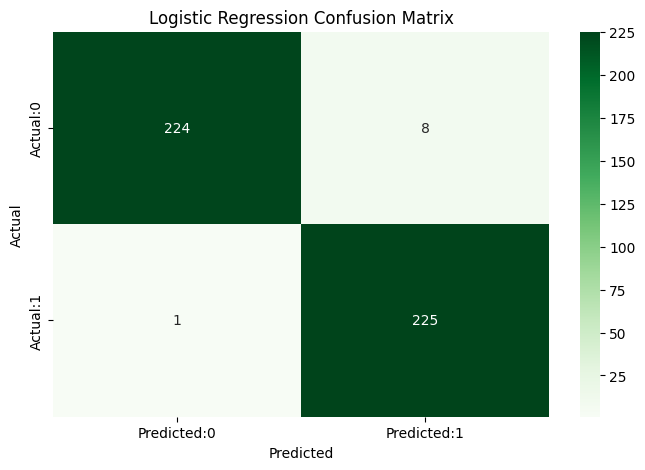

In [108]:
cm = confusion_matrix(y_test, y_pred1)
conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'], 
                           index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens")  
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [109]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       232
           1       0.97      1.00      0.98       226

    accuracy                           0.98       458
   macro avg       0.98      0.98      0.98       458
weighted avg       0.98      0.98      0.98       458



In [110]:
y_pred_test = lr.predict(X_test)
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [111]:
test.head()

,Actual,Y test predicted
493,0,0
16,0,0
288,0,0
792,1,1
1061,1,1


In [112]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)
print(accuracy_score(y_test, knn_predict))
accuracy[str(lr)] = accuracy_score(y_test, knn_predict)*100

0.9978165938864629


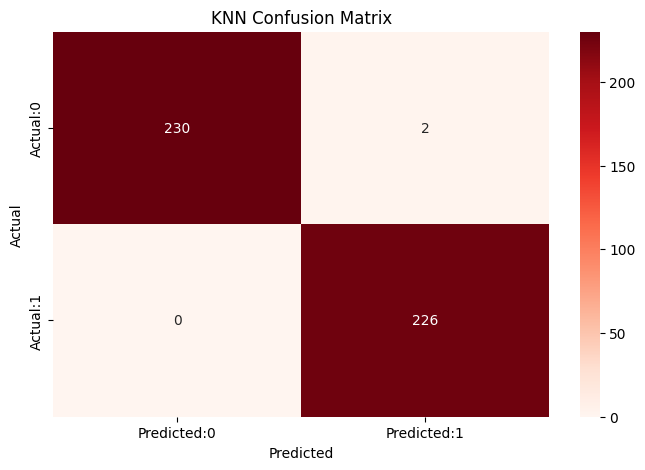

In [115]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
conf_matrix = pd.DataFrame(data=cm,
                           columns=['Predicted:0', 'Predicted:1'], 
                           index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Reds")  
plt.title("KNN Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [116]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       226

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458



In [117]:
y_pred_test = knn_model.predict(X_test)
test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [118]:
test.sample(10)

,Actual,Y test predicted
188,0,0
1489,1,1
614,0,0
1253,1,1
228,0,0
1207,1,1
1443,1,1
904,1,1
119,0,0
170,0,0


# Deep Learning 

In [119]:
import tensorflow as tf
from tensorflow import keras

# Create Neural Network

In [120]:
model=keras.Sequential([
    keras.layers.Dense(4800,input_shape=[21], activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(1,activation="sigmoid")
])
model.summary()

C:\Users\MSI\anaconda3\envs\Joya\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4800)                │         105,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2000)                │       9,602,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,710,601 (48.49 MB)

 Trainable params: 12,710,601 (48.49 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))  
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7684 - loss: 0.6680 - val_accuracy: 0.9112 - val_loss: 0.6100
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9260 - loss: 0.5898 - val_accuracy: 0.9065 - val_loss: 0.5455
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9031 - loss: 0.5225 - val_accuracy: 0.9019 - val_loss: 0.4811
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9057 - loss: 0.4527 - val_accuracy: 0.9112 - val_loss: 0.4171
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9153 - loss: 0.3881 - val_accuracy: 0.9299 - val_loss: 0.3528
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9306 - loss: 0.3251 - val_accuracy: 0.9439 - val_loss: 0.2907
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9423 - loss: 0.2713 - val_accuracy: 0.9579 - val_loss: 0.2336
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9627 - loss: 0.2172 - val_accuracy: 0.9673 - val_loss: 0.1846

In [123]:
model.evaluate(X_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023   


[0.002191774547100067, 1.0]

In [124]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)
y_pred[:11]
y_test[:11]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       232
           1       1.00      1.00      1.00       226

    accuracy                           1.00       458
   macro avg       1.00      1.00      1.00       458
weighted avg       1.00      1.00      1.00       458



<Axes: >

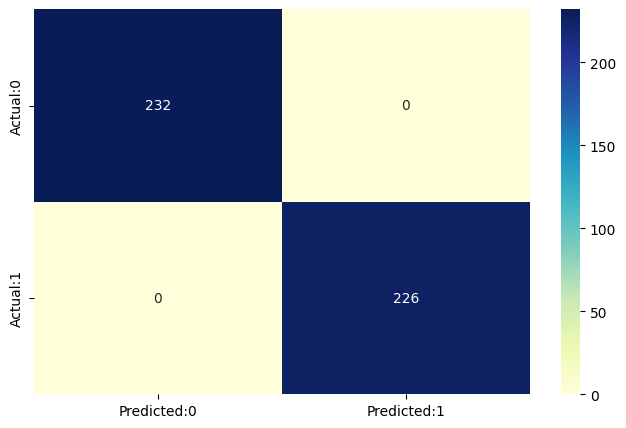

In [125]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [126]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(21,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

C:\Users\MSI\anaconda3\envs\Joya\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,577 (1.99 MB)

 Trainable params: 520,577 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [128]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

In [129]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))  
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
train = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.3, callbacks=cb)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4739 - loss: 0.6883 - val_accuracy: 0.5156 - val_loss: 0.6675
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4832 - loss: 0.6767 - val_accuracy: 0.5156 - val_loss: 0.6597
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4886 - loss: 0.6675 - val_accuracy: 0.5156 - val_loss: 0.6520
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4921 - loss: 0.6588 - val_accuracy: 0.5156 - val_loss: 0.6446
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5256 - loss: 0.6409 - val_accuracy: 0.5188 - val_loss: 0.6373
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5130 - loss: 0.6385 - val_accuracy: 0.5344 - val_loss: 0.6303
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5260 - loss: 0.6311 - val_accuracy: 0.6062 - val_loss: 0.6236
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6037 - loss: 0.6285 - val_accuracy: 0.7219 - val_loss: 0.6170
Epoch 9

# Testing the model

In [130]:
model.evaluate(X_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9148 - loss: 0.3794


[0.3861810564994812, 0.9104803204536438]

In [131]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)
y_pred[:11]
y_test[:11]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       232
           1       0.90      0.92      0.91       226

    accuracy                           0.91       458
   macro avg       0.91      0.91      0.91       458
weighted avg       0.91      0.91      0.91       458



# Confusion Matrix

<Axes: >

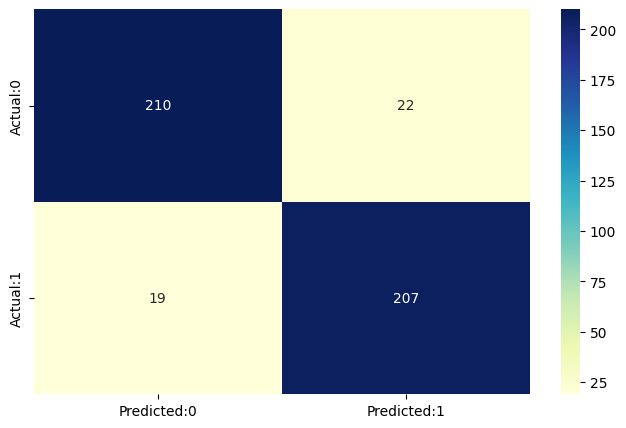

In [132]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")